<a href="https://colab.research.google.com/github/iemio/langchain_family/blob/main/notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langsmith

In [2]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')
langsmith=userdata.get('LANGSMITH_API_KEY')
print(langsmith)


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


In [3]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true" #a feature used to track and visualize execution flows, which helps in debugging and optimization.
os.environ["LANGCHAIN_PROJECT"]="Langgraph_intro" #assigns a project name for LangChain's tracing system, helping in organizing and identifying different runs.

In [4]:
!pip install langchain_groq
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x790a6616a550>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x790a65ef0610>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

#Start Building Chatbot Using Langgraph

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

 State is used to store and track information as data flows through the graph. It represents the current state of the conversation, ensuring that messages and other relevant data persist across interactions.

In [7]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State) #Creates a new graph where State defines the data structure.This ensures that all nodes in the graph use and update this state.

In [8]:
graph_builder

In [9]:
def chatbot(state:State): #Each node in the LangGraph workflow reads and modifies State.
  return {"messages":llm.invoke(state['messages'])}

In [10]:
graph_builder.add_node("chatbot",chatbot)

In [11]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [12]:
graph=graph_builder.compile()

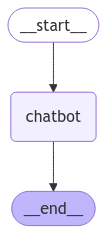

In [13]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [15]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 4e-07, 'queue_time': 0.025080398, 'total_time': 0.027273127}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-0793d645-cd0f-4f64-bc13-9b921bfe6c8a-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
Assistant: Hello! 👋

How can I help you today? 😊



KeyboardInterrupt: Interrupted by user